In [40]:
#Importamos librerías
import pandas as pd 
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

In [2]:
#Importamos base de datos
df = pd.read_csv("base_datos_2008.csv")

In [3]:
#Se debe utilizar solo datos que tengan valor en la variable dependiente
df= df.dropna(subset="ArrDelay")

In [4]:
#Solo se utilizarán 5.000
df=df.sample(frac=1).head(5000)
df=df.reset_index()

X=df[["AirTime","Distance","DepDelay"]]
Y=df["ArrDelay"]

In [6]:
regr = linear_model.LinearRegression()
loo = LeaveOneOut()

In [31]:
error=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    regr.fit(X_train, y_train)
    pred= regr.predict(X_test)
    mse=mean_squared_error(y_test, pred)
    error.append(mse)


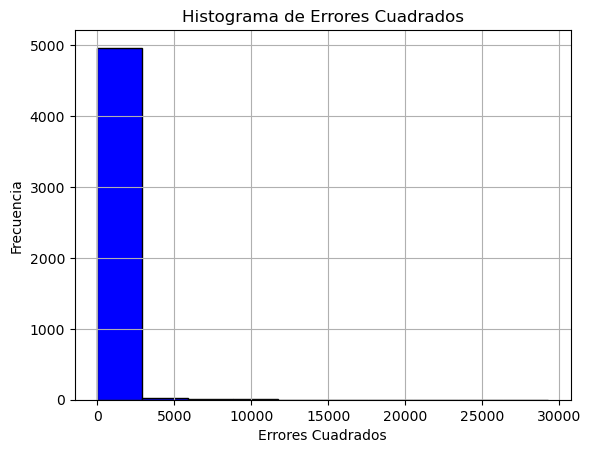

In [37]:
plt.hist(error, bins=10, color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Errores Cuadrados')
plt.xlabel('Errores Cuadrados')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el histograma
plt.show()

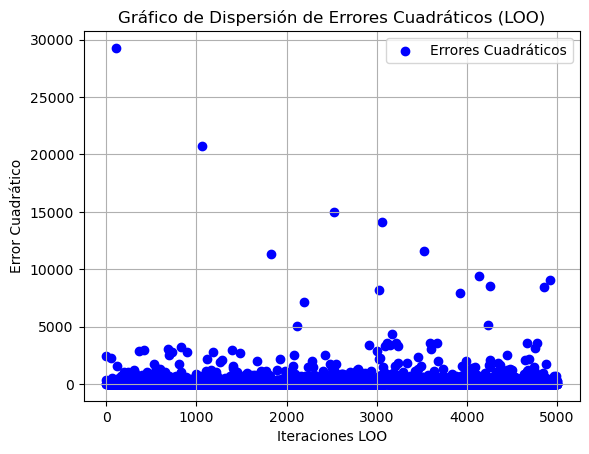

In [39]:
indices = list(range(1, len(error) + 1))
plt.scatter(indices, error, marker='o', color='b', label='Errores Cuadráticos')
plt.xlabel('Iteraciones LOO')
plt.ylabel('Error Cuadrático')
plt.title('Gráfico de Dispersión de Errores Cuadráticos (LOO)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


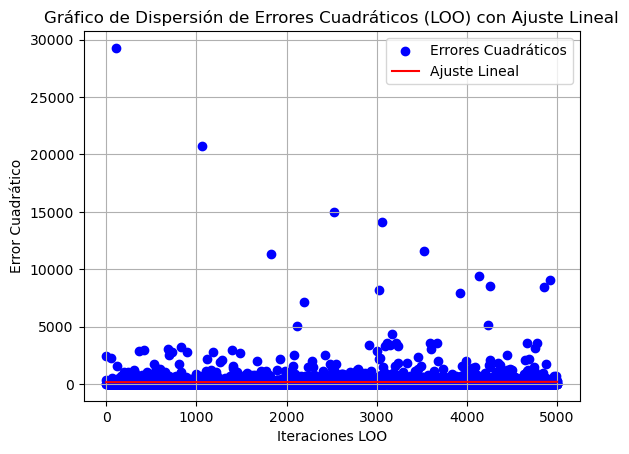

In [41]:
# Definir una función de regresión lineal (y = mx + b)
def linear_function(x, m, b):
    return m * x + b

# Indices e mse_list contienen los datos de errores cuadráticos
indices = np.array(list(range(1, len(error) + 1)))
error = np.array(error)

# Ajustar una regresión lineal a los datos
params, covariance = curve_fit(linear_function, indices, error)

# Obtener los parámetros ajustados
m, b = params

# Crear un rango de valores para la línea de ajuste
x_fit = np.linspace(1, len(error), 100)
y_fit = linear_function(x_fit, m, b)

# Crear un gráfico de dispersión de errores cuadráticos
plt.scatter(indices, error, marker='o', color='b', label='Errores Cuadráticoss')
plt.plot(x_fit, y_fit, color='r', label='Ajuste Lineal')
plt.xlabel('Iteraciones LOO')
plt.ylabel('Error Cuadrático')
plt.title('Gráfico de Dispersión de Errores Cuadráticos (LOO) con Ajuste Lineal')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()